In [1]:
# Import the election results
# Source: https://bundeswahlleiterin.de/bundestagswahlen/2025/ergebnisse/opendata.html

import csv
import pandas as pd

data = pd.read_csv('data/kerg2.csv', sep=';', quoting=csv.QUOTE_NONE, skiprows=9, decimal=',')
data.describe()

Gebietsnummer  UegGebietsnummer  Gruppenreihenfolge        Stimme  \
count   15617.000000      15550.000000        15617.000000  14985.000000   
mean      143.501505         12.028296           49.421976      1.499499   
std        87.707189         20.216208          195.353669      0.500016   
min         1.000000          1.000000           -4.000000      1.000000   
25%        71.000000          5.000000            4.000000      1.000000   
50%       140.000000          8.000000           10.000000      1.000000   
75%       220.000000          9.000000           16.000000      2.000000   
max       299.000000         99.000000         1000.000000      2.000000   

             Anzahl      Prozent    VorpAnzahl   VorpProzent  DiffProzent  \
count  9.747000e+03  9431.000000  1.145900e+04  11143.000000  8523.000000   
mean   9.523325e+04    16.164363  7.692086e+04     13.505464    17.251792   
std    1.163290e+06    27.784958  1.028519e+06     25.577774    93.349811   
min    8.000000e+00     0.000147  0.000000e+00      0.000000   -99.373144   
25%    1.063000e+03     0.557557  7.675000e+02      0.411566   -30.757267   
50%    7.377000e+03     3.603024  3.312000e+03      1.642346    -1.436097   
75%    3.640400e+04    17.889218  2.712350e+04     12.772813    28.819767   
max    6.049060e+07    99.787920  6.117277e+07     99.696519  3792.105263   

       DiffProzentPkt  Bemerkung  
count    11143.000000        0.0  
mean        -0.033892        NaN  
std          4.263536        NaN  
min        -23.137606        NaN  
25%         -1.108785        NaN  
50%         -0.176104        NaN  
75%          0.262190        NaN  
max         26.392802        NaN

In [2]:
#data['Gruppenart'].unique()
#data['Gruppenname'].unique()

data

Wahlart     Wahltag Gebietsart  Gebietsnummer   Gebietsname  \
0          BT  23.02.2025       Bund             99  Bundesgebiet   
1          BT  23.02.2025       Bund             99  Bundesgebiet   
2          BT  23.02.2025       Bund             99  Bundesgebiet   
3          BT  23.02.2025       Bund             99  Bundesgebiet   
4          BT  23.02.2025       Bund             99  Bundesgebiet   
...       ...         ...        ...            ...           ...   
15612      BT  23.02.2025  Wahlkreis            299       Homburg   
15613      BT  23.02.2025  Wahlkreis            299       Homburg   
15614      BT  23.02.2025  Wahlkreis            299       Homburg   
15615      BT  23.02.2025  Wahlkreis            299       Homburg   
15616      BT  23.02.2025  Wahlkreis            299       Homburg   

      UegGebietsart  UegGebietsnummer     Gruppenart      Gruppenname  \
0               NaN               NaN  System-Gruppe  Wahlberechtigte   
1               NaN               NaN  System-Gruppe         Wählende   
2               NaN               NaN  System-Gruppe        Ungültige   
3               NaN               NaN  System-Gruppe        Ungültige   
4               NaN               NaN  System-Gruppe          Gültige   
...             ...               ...            ...              ...   
15612          LAND              10.0         Partei              ÖDP   
15613          LAND              10.0         Partei       Die PARTEI   
15614          LAND              10.0         Partei       Die PARTEI   
15615          LAND              10.0  System-Gruppe           Übrige   
15616          LAND              10.0  System-Gruppe           Übrige   

       Gruppenreihenfolge  Stimme      Anzahl    Prozent  VorpAnzahl  \
0                      -4     NaN  60490603.0        NaN  61172771.0   
1                      -3     NaN  49927315.0  82.537307  46707343.0   
2                      -2     1.0    429129.0   0.859507    488483.0   
3                      -2     2.0    285228.0   0.571286    408956.0   
4                      -1     1.0  49498186.0  99.140493  46218860.0   
...                   ...     ...         ...        ...         ...   
15612                  16     2.0         NaN        NaN       645.0   
15613                  17     1.0         NaN        NaN      3287.0   
15614                  17     2.0         NaN        NaN      2202.0   
15615                1000     1.0         NaN        NaN         0.0   
15616                1000     2.0         NaN        NaN       362.0   

       VorpProzent  DiffProzent  DiffProzentPkt  Bemerkung Gewählt  
0              NaN    -1.115150             NaN        NaN     NaN  
1        76.353159     6.893931        6.184149        NaN     NaN  
2         1.045838   -12.150679       -0.186330        NaN     NaN  
3         0.875571   -30.254600       -0.304285        NaN     NaN  
4        98.954162     7.095212        0.186330        NaN     NaN  
...            ...          ...             ...        ...     ...  
15612     0.461100          NaN       -0.461100        NaN     SPD  
15613     2.354382          NaN       -2.354382        NaN     SPD  
15614     1.574173          NaN       -1.574173        NaN     SPD  
15615     0.000000          NaN        0.000000        NaN     SPD  
15616     0.258788          NaN       -0.258788        NaN     SPD  

[15617 rows x 19 columns]

In [3]:
# Import the shape files
# Source: https://bundeswahlleiterin.de/bundestagswahlen/2025/wahlkreiseinteilung/downloads.html
# Source: https://regionalatlas.statistikportal.de/#

import geopandas as gpd

outline_shape = gpd.read_file('data/B-2022-AI004-2--AI0402--2025-02-24.shp')

shape = gpd.read_file('data/Geometrie_Wahlkreise_20DBT.shp')

# BTW2025 fix:
# Für die Bundestagswahl 2025 wurde aufgrund der Bevölkerungsentwicklung ein Wahlkreis aus Sachsen-Anhalt an Bayern umverteilt.
# Dadurch ändert sich gegenüber der Bundestagswahl 2021 bei den bisherigen Wahlkreisen 72 bis 255 die Nummerierung.

# keep original Wahlkreisnummer
shape['WKR_NR_ORIG'] = shape['WKR_NR']

# update Wahlkreisnummer
loc = shape.query("WKR_NR >= 71 & WKR_NR <= 255").index
shape.loc[loc, 'WKR_NR'] -= 1

# remove old Wahlkreis #71
#shape.drop(shape[shape['WKR_NR_ORIG'] == 71].index, inplace=True)

shape

WKR_NR                           WKR_NAME LAND_NR           LAND_NAME  \
0         1              Flensburg – Schleswig      01  Schleswig-Holstein   
1         2  Nordfriesland – Dithmarschen Nord      01  Schleswig-Holstein   
2         3       Steinburg – Dithmarschen Süd      01  Schleswig-Holstein   
3         4              Rendsburg-Eckernförde      01  Schleswig-Holstein   
4         5                               Kiel      01  Schleswig-Holstein   
..      ...                                ...     ...                 ...   
294     295           Zollernalb – Sigmaringen      08   Baden-Württemberg   
295     296                        Saarbrücken      10            Saarland   
296     297                          Saarlouis      10            Saarland   
297     298                         St. Wendel      10            Saarland   
298     299                            Homburg      10            Saarland   

                                              geometry  WKR_NR_ORIG  
0    POLYGON ((545529.753 6076163.75, 547088.171 60...            1  
1    MULTIPOLYGON (((476067.108 6037980.858, 475958...            2  
2    MULTIPOLYGON (((479945.781 5988645.755, 479579...            3  
3    POLYGON ((556160.515 6033727.094, 556191.517 6...            4  
4    POLYGON ((577152.01 6029911.424, 577427.4 6029...            5  
..                                                 ...          ...  
294  POLYGON ((489279.474 5358727.78, 489443.864 53...          295  
295  POLYGON ((354192.133 5465029.478, 355062.306 5...          296  
296  POLYGON ((347894.305 5496015.159, 348628.459 5...          297  
297  POLYGON ((359840.989 5499356.064, 360105.639 5...          298  
298  POLYGON ((376143.144 5474239.112, 376579.402 5...          299  

[299 rows x 6 columns]

In [4]:
# Setup plotting functions

import matplotlib.pyplot as plt
import matplotlib as mpl


# Filter and merge election results with shape file
# Input: results dataframe, index string for filtering
def shapefunc(data: pd.DataFrame, index: str):

    # index of filtered values on input data
    loc = data.query(index).index
    results = data.iloc[loc]

    # merged output data
    shapedata = shape.merge(results,
                            left_on='WKR_NR', right_on='Gebietsnummer')

    return shapedata

# Plot shape files overlaid with election results
# Input: merged dataframe, column name to plot, colormap name, plot title, output filename
def plotfunc(data: pd.DataFrame|None = None, column: str = "", cmap: str = "", title: str = "", name: str = ""):

    # new plot on empty canvas
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    ax.axis('off')

    # plot basic shape file
    shape.plot(ax=ax, facecolor='.7', edgecolor='k', lw=.2)

    try:
        # setup colormap
        norm = mpl.colors.Normalize(vmin=data[column].min(), vmax=data[column].max())
        cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

        # plot merged shape data with color overlay
        data.plot(ax=ax, column=column, cmap=cmap, norm=norm, edgecolor='k', lw=.2,
                  missing_kwds=dict(color='lightgrey', edgecolor='red', hatch='///', label="Missing values"),
                  legend=False)

        # add colorbar
        cax = fig.add_axes([0.48, 0.94, 0.25, 0.01])
        fig.colorbar(cbar, cax=cax, orientation='horizontal')
        cax.set_title(title)

    except Exception as e:
        pass

    # plot outline shape file (federal states)
    outline_shape.plot(ax=ax, facecolor='none', edgecolor='k', lw=.7)

    # add copyright info
    plt.text(0, 0,
             "(c) Die Bundeswahlleiterin, Wiesbaden 2025\n(c) Statistische Ämter des Bundes und der Länder\nhttps://www.govdata.de/dl-de/by-2-0",
             fontsize=8, transform=ax.transAxes)

    # finalize and save output file
    plt.tight_layout()
    plt.savefig(f'plots/{name}.png', dpi=150)

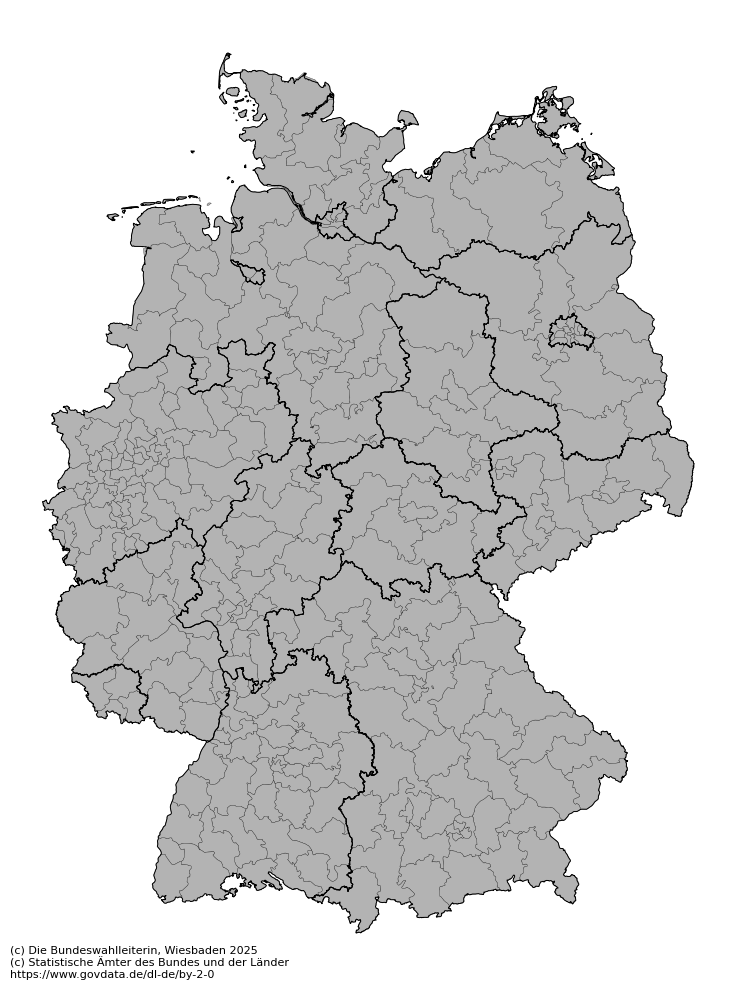

In [5]:
plotfunc(name="Wahlkreise")

In [6]:
# Ensure that results are matched correctly to the shapes

loc = data.query("Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'Gültige'").index
results = data.iloc[loc]

results = results.merge(shape, right_on='WKR_NR', left_on='Gebietsnummer')

# Show rows where Gebietsname and Wahlkreisname don't match (we expect some differences here but not many)
results[ results['WKR_NAME'] != results['Gebietsname'] ]


Wahlart     Wahltag Gebietsart  Gebietsnummer  \
51      BT  23.02.2025  Wahlkreis             52   
52      BT  23.02.2025  Wahlkreis             53   
61      BT  23.02.2025  Wahlkreis             62   
64      BT  23.02.2025  Wahlkreis             65   
65      BT  23.02.2025  Wahlkreis             66   
66      BT  23.02.2025  Wahlkreis             67   
69      BT  23.02.2025  Wahlkreis             70   
70      BT  23.02.2025  Wahlkreis             70   

                             Gebietsname UegGebietsart  UegGebietsnummer  \
51      Goslar – Northeim – Göttingen II          LAND               3.0   
52                           Göttingen I          LAND               3.0   
61  Dahme-Spreewald – Teltow-Fläming III          LAND              12.0   
64   Elbe-Elster – Oberspreewald-Lausitz          LAND              12.0   
65             Altmark – Jerichower Land          LAND              15.0   
66                 Börde – Salzlandkreis          LAND              15.0   
69          Anhalt – Dessau – Wittenberg          LAND              15.0   
70          Anhalt – Dessau – Wittenberg          LAND              15.0   

       Gruppenart Gruppenname  Gruppenreihenfolge  ...  DiffProzent  \
51  System-Gruppe     Gültige                  -1  ...     8.640691   
52  System-Gruppe     Gültige                  -1  ...     8.934219   
61  System-Gruppe     Gültige                  -1  ...     9.304404   
64  System-Gruppe     Gültige                  -1  ...     4.432083   
65  System-Gruppe     Gültige                  -1  ...    12.057482   
66  System-Gruppe     Gültige                  -1  ...    14.003009   
69  System-Gruppe     Gültige                  -1  ...    11.479127   
70  System-Gruppe     Gültige                  -1  ...    11.479127   

    DiffProzentPkt  Bemerkung  Gewählt  WKR_NR  \
51        0.278334        NaN      SPD      52   
52        0.448120        NaN      CDU      53   
61        0.678460        NaN      AfD      62   
64        0.828934        NaN      AfD      65   
65        0.319571        NaN      AfD      66   
66        0.239056        NaN      AfD      67   
69        0.352215        NaN      AfD      70   
70        0.352215        NaN      AfD      70   

                                             WKR_NAME  LAND_NR  \
51                       Goslar – Northeim – Osterode       03   
52                                          Göttingen       03   
61  Dahme-Spreewald – Teltow-Fläming III – Oberspr...       12   
64             Elbe-Elster – Oberspreewald-Lausitz II       12   
65                                            Altmark       15   
66                            Börde – Jerichower Land       15   
69                                Dessau – Wittenberg       15   
70                                             Anhalt       15   

         LAND_NAME                                           geometry  \
51   Niedersachsen  POLYGON ((608971.79 5760306.533, 611221.447 57...   
52   Niedersachsen  POLYGON ((606494.512 5724934.799, 605776.671 5...   
61     Brandenburg  POLYGON ((804618.348 5815070.896, 805196.878 5...   
64     Brandenburg  POLYGON ((849532.719 5755954.22, 849669.813 57...   
65  Sachsen-Anhalt  POLYGON ((676943.024 5876266.846, 682923.332 5...   
66  Sachsen-Anhalt  POLYGON ((702969.973 5823160.958, 703217.541 5...   
69  Sachsen-Anhalt  POLYGON ((736409.463 5768468, 736724.342 57684...   
70  Sachsen-Anhalt  POLYGON ((725472.673 5777428.668, 727031.314 5...   

    WKR_NR_ORIG  
51           52  
52           53  
61           62  
64           65  
65           66  
66           67  
69           70  
70           71  

[8 rows x 25 columns]

In [7]:
# interactive plot

shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'AfD'")

shapedata.explore(
    column="DiffProzent",
    popup=True,
    tiles="CartoDB positron",
    cmap="plasma",
    style_kwds=dict(color="black"),
)


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


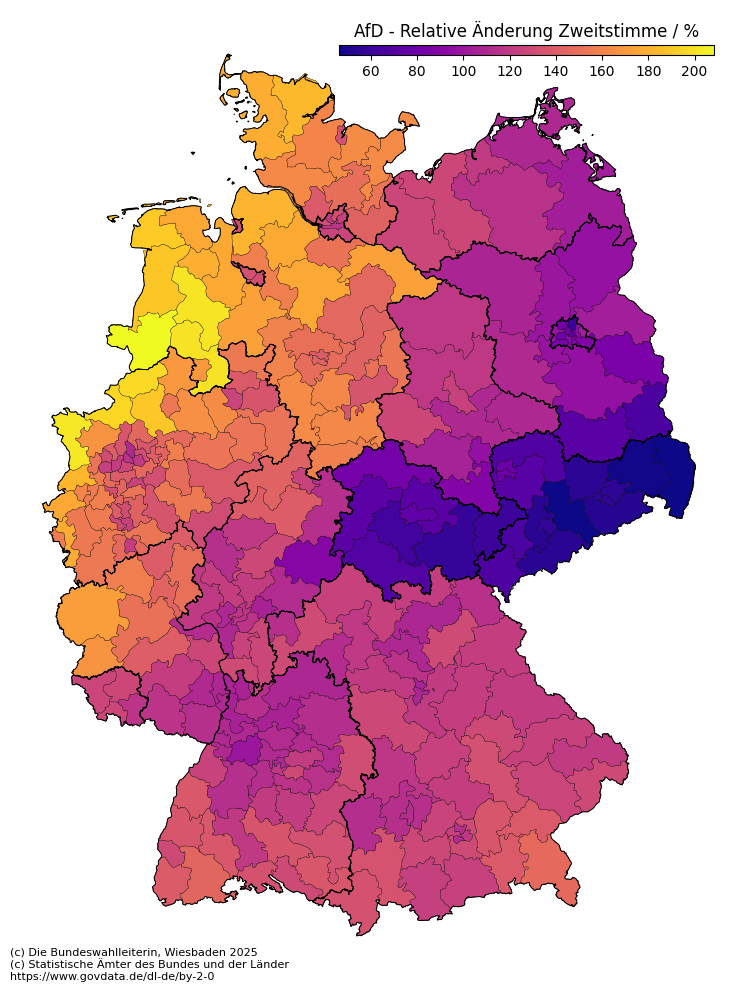

In [8]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'AfD'")

plotfunc(data=shapedata, column="DiffProzent", cmap="plasma",
         title="AfD - Relative Änderung Zweitstimme / %", name="Wahlkreis_Zweitstimme_AfD_DiffProzent")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


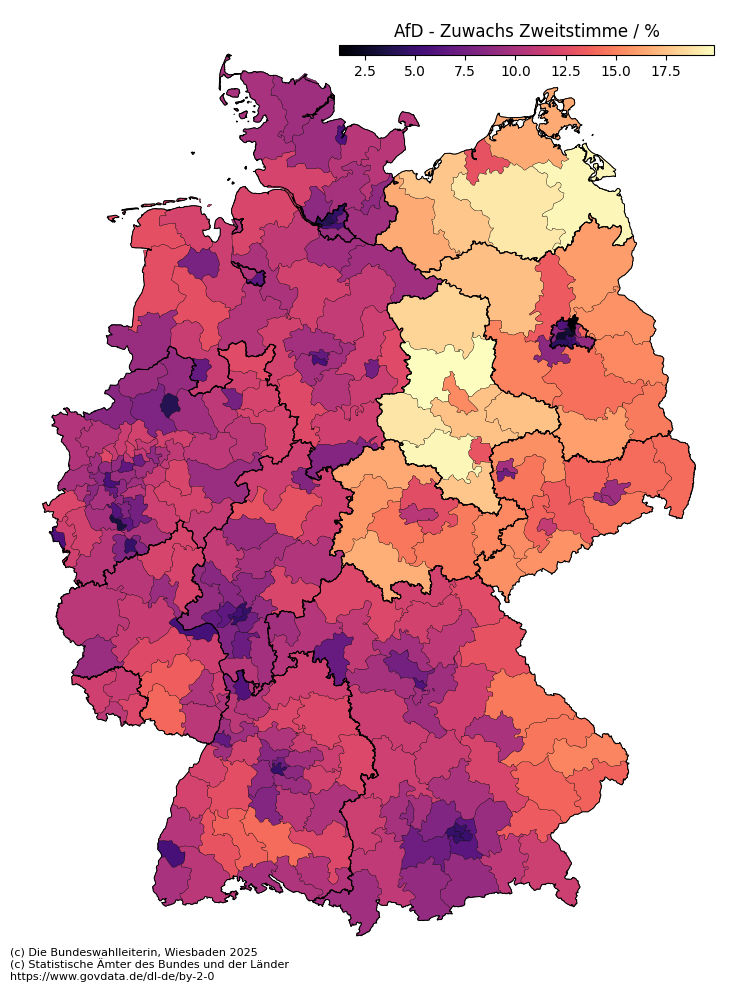

In [9]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'AfD'")

plotfunc(data=shapedata, column="DiffProzentPkt", cmap="magma",
         title="AfD - Zuwachs Zweitstimme / %", name="Wahlkreis_Zweitstimme_AfD_DiffProzentPkt")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


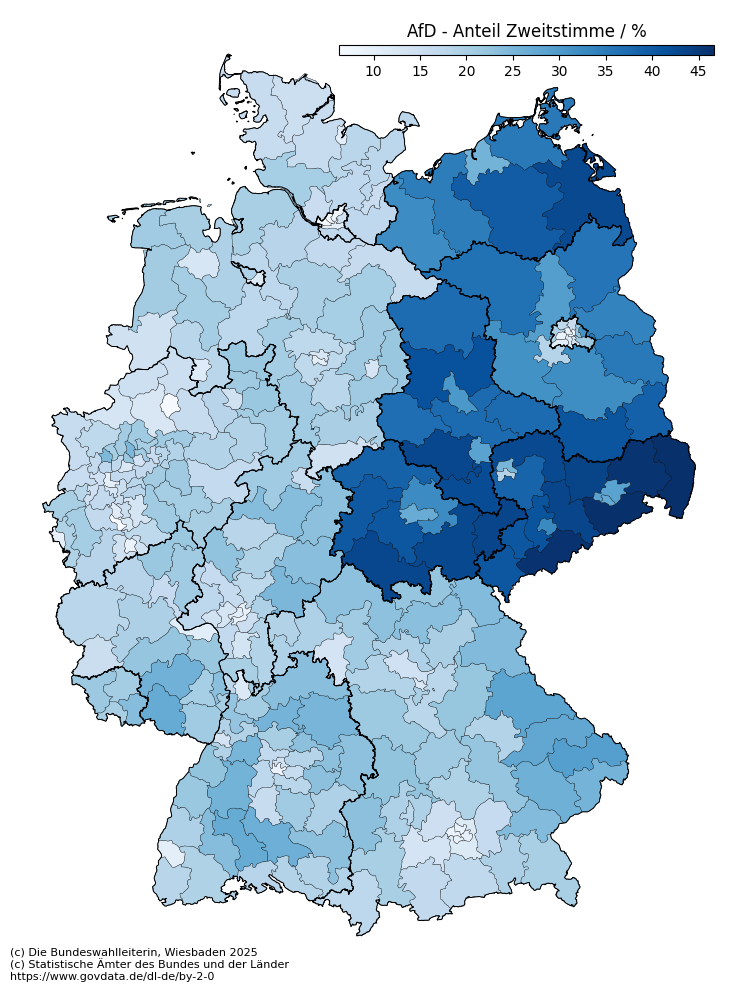

In [10]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'AfD'")

plotfunc(data=shapedata, column="Prozent", cmap="Blues",
         title="AfD - Anteil Zweitstimme / %", name="Wahlkreis_Zweitstimme_AfD_Prozent")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


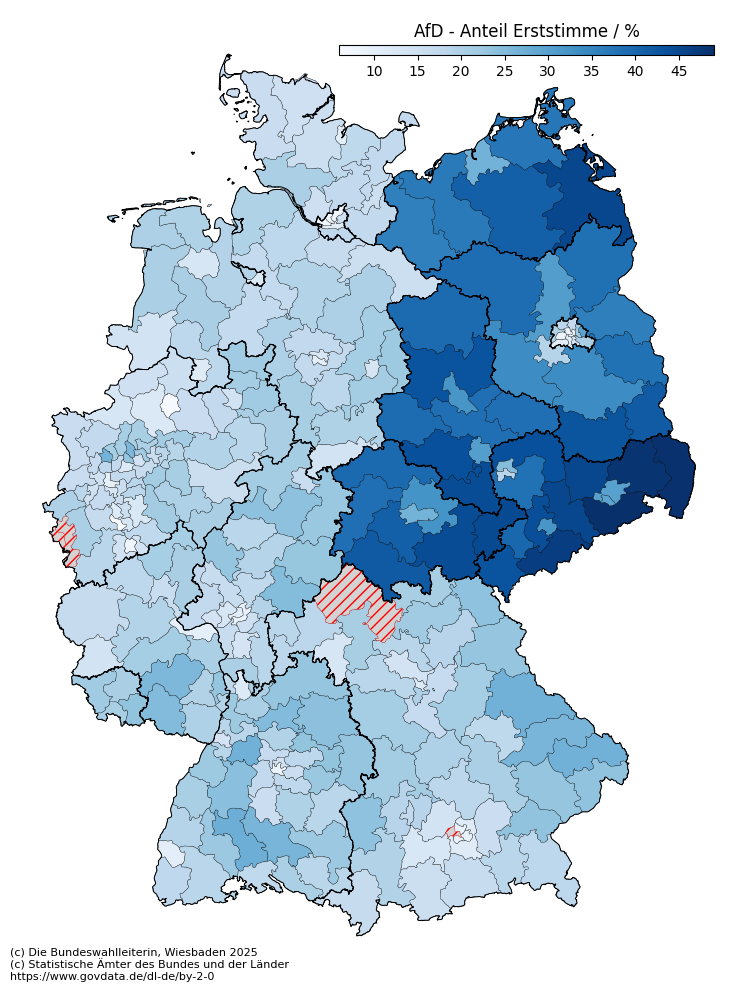

In [11]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 1 & Gruppenname == 'AfD'")

plotfunc(data=shapedata, column="Prozent", cmap="Blues",
         title="AfD - Anteil Erststimme / %", name="Wahlkreis_Erststimme_AfD_Prozent")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


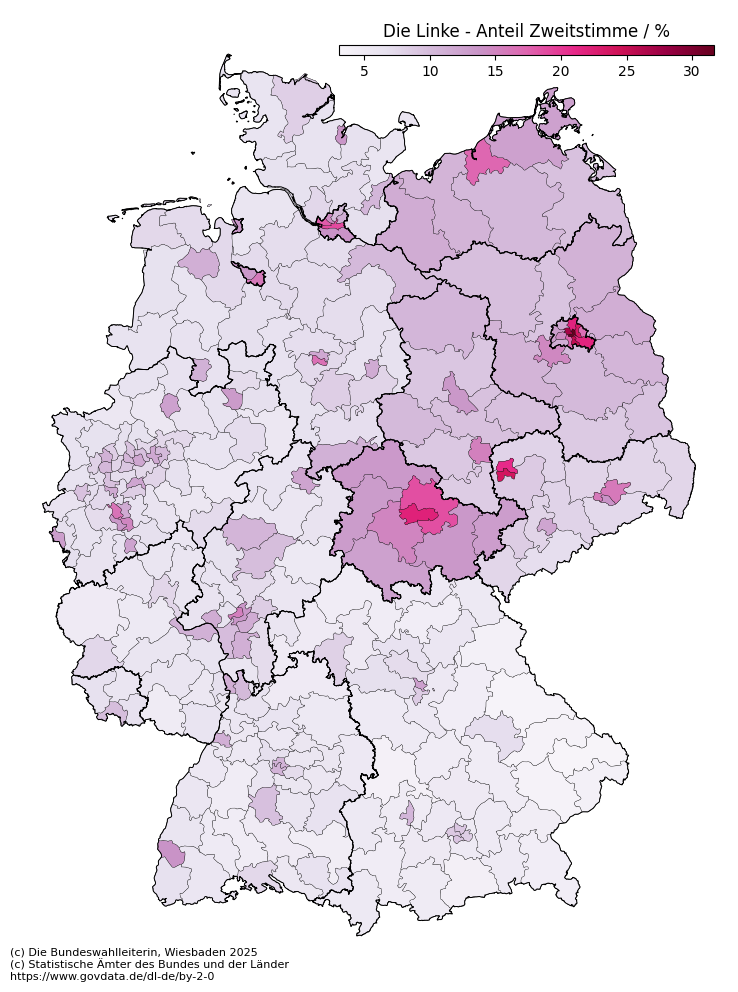

In [12]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'Die Linke'")

plotfunc(data=shapedata, column="Prozent", cmap="PuRd",
         title="Die Linke - Anteil Zweitstimme / %", name="Wahlkreis_Zweitstimme_DieLinke_Prozent")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


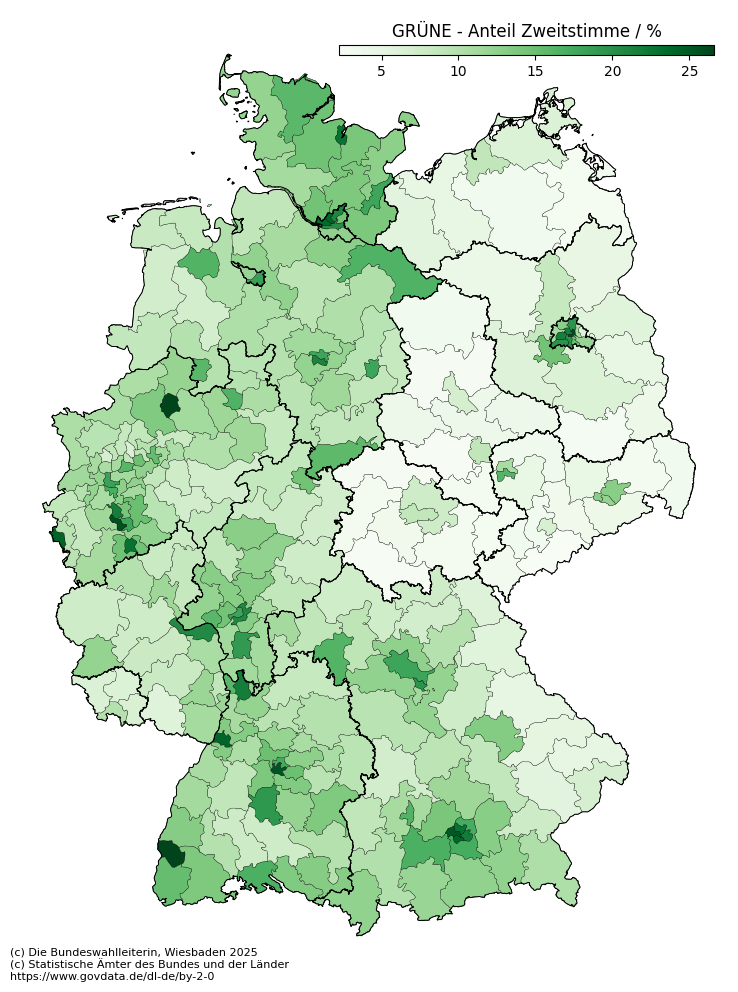

In [13]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'GRÜNE'")

plotfunc(data=shapedata, column="Prozent", cmap="Greens",
         title="GRÜNE - Anteil Zweitstimme / %", name="Wahlkreis_Zweitstimme_Gruene_Prozent")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


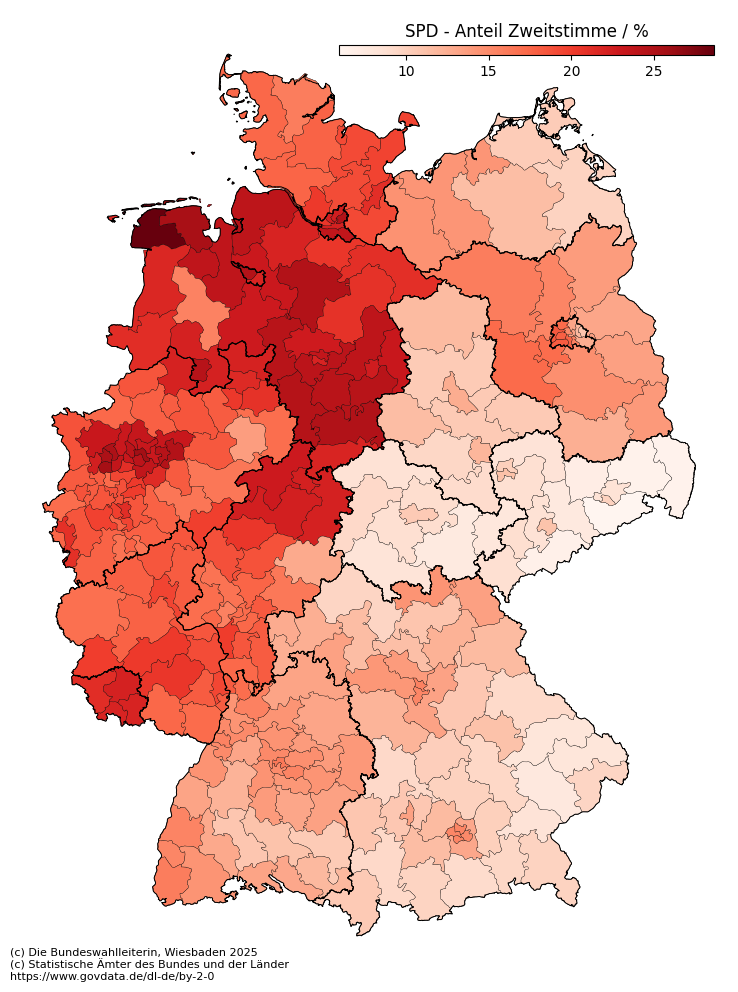

In [14]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'SPD'")

plotfunc(data=shapedata, column="Prozent", cmap="Reds",
         title="SPD - Anteil Zweitstimme / %", name="Wahlkreis_Zweitstimme_DieLinke_Prozent")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


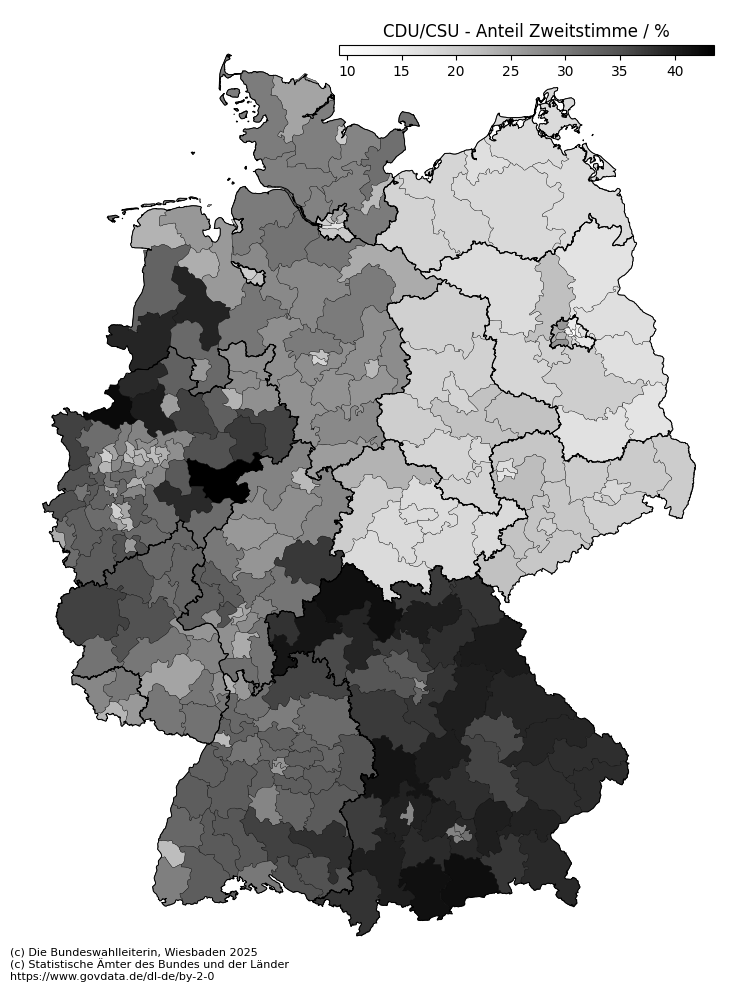

In [15]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & (Gruppenname == 'CDU' | Gruppenname == 'CSU')")

plotfunc(data=shapedata, column="Prozent", cmap="Greys",
         title="CDU/CSU - Anteil Zweitstimme / %", name="Wahlkreis_Zweitstimme_Ungueltige")


/tmp/ipykernel_31172/139245131.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


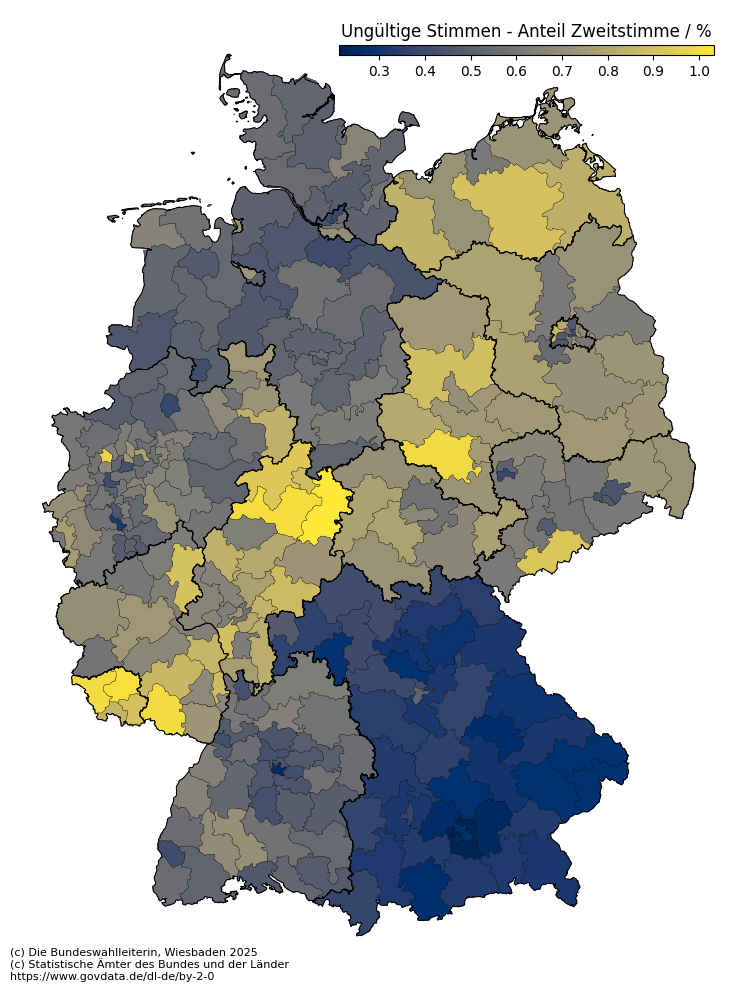

In [16]:
shapedata = shapefunc(data=data,
                      index="Gebietsart == 'Wahlkreis' & Stimme == 2 & Gruppenname == 'Ungültige'")

plotfunc(data=shapedata, column="Prozent", cmap="cividis",
         title="Ungültige Stimmen - Anteil Zweitstimme / %", name="Wahlkreis_Zweitstimme_Ungueltige")
